# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

sub_cities = cities[:]

len(sub_cities)

print("Beginning data retrival \n-----------------------------------")
  
city_result = []
cloudiness = []
countries = []
call_dates = []
humidities = []
lats = []
longs = []
maxtemps = []
windspeeds = []


    


    
for index,city in enumerate(sub_cities):
    print(f"Processing Record {index}|{city}")
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])    
        countries.append(response['sys']['country'])
        call_dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        maxtemps.append(response['main']['temp_max'])
        windspeeds.append(response['wind']['speed'])
        city_result.append(city)

    except:
        print("City not found. Skipping...")

    
    
    
    
    
    
    



# Loop through the list of cities and perform a request for data on each
# for city in cities:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")



Beginning data retrival 
-----------------------------------
Processing Record 0|rikitea
Processing Record 1|khatanga
Processing Record 2|brigantine
Processing Record 3|mataura
Processing Record 4|hermanus
Processing Record 5|castro
Processing Record 6|vardo
Processing Record 7|kapaa
Processing Record 8|cape town
Processing Record 9|baykit
Processing Record 10|hobart
Processing Record 11|vostok
Processing Record 12|ribeira grande
Processing Record 13|east london
Processing Record 14|yantikovo
Processing Record 15|mar del plata
Processing Record 16|nikolskoye
Processing Record 17|ulladulla
Processing Record 18|lebu
Processing Record 19|albany
Processing Record 20|uribia
Processing Record 21|jamestown
Processing Record 22|cherskiy
Processing Record 23|san patricio
Processing Record 24|busselton
Processing Record 25|mlawa
Processing Record 26|evensk
Processing Record 27|new norfolk
Processing Record 28|dikson
Processing Record 29|zabaykalsk
Processing Record 30|sumbe
Processing Record 31|

Processing Record 241|ponta delgada
Processing Record 242|rock sound
Processing Record 243|umzimvubu
City not found. Skipping...
Processing Record 244|bowen
Processing Record 245|amderma
City not found. Skipping...
Processing Record 246|maloshuyka
City not found. Skipping...
Processing Record 247|dalby
Processing Record 248|nuuk
Processing Record 249|henties bay
Processing Record 250|makat
Processing Record 251|ilek
Processing Record 252|paamiut
Processing Record 253|maanshan
Processing Record 254|pangoa
Processing Record 255|thunder bay
Processing Record 256|sobolevo
Processing Record 257|nayoro
Processing Record 258|muravlenko
Processing Record 259|mocambique
City not found. Skipping...
Processing Record 260|raudeberg
Processing Record 261|omsukchan
Processing Record 262|ibra
Processing Record 263|haibowan
City not found. Skipping...
Processing Record 264|vaitupu
City not found. Skipping...
Processing Record 265|chapais
Processing Record 266|nieuw amsterdam
Processing Record 267|mana

Processing Record 483|shingu
Processing Record 484|suao
City not found. Skipping...
Processing Record 485|armidale
Processing Record 486|komsomolskiy
Processing Record 487|talara
Processing Record 488|inongo
Processing Record 489|manama
Processing Record 490|pokrovsk-uralskiy
City not found. Skipping...
Processing Record 491|grindavik
Processing Record 492|bay-khaak
Processing Record 493|mugur-aksy
Processing Record 494|poplar bluff
Processing Record 495|milici
Processing Record 496|qax
Processing Record 497|diffa
Processing Record 498|atasu
Processing Record 499|touho
Processing Record 500|college
Processing Record 501|port-cartier
Processing Record 502|southbridge
Processing Record 503|havelock
Processing Record 504|nouadhibou
Processing Record 505|kathu
Processing Record 506|coahuayana
Processing Record 507|san quintin
Processing Record 508|big spring
Processing Record 509|kajaani
Processing Record 510|wuda
Processing Record 511|sattahip
Processing Record 512|chernyshevskiy
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:



weather_dict = {
    "City": city_result,
    "Cloudiness" : cloudiness,
    "Country" : countries,
    "Date" : call_dates,
    "Humidity" : humidities,
    "Lat" : lats,
    "Lng" : longs,
    "Max Temp": maxtemps,
    "Wind Speed" : windspeeds

}

weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [38]:
weather_data.to_csv("cityWeatherData.csv", sep=',', encoding='utf-8')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,92,PF,1539312982,100,-23.12,-134.97,21.62,5.91
1,khatanga,0,RU,1539312983,84,71.98,102.47,-4.26,6.51
2,brigantine,90,US,1539310620,97,39.41,-74.36,24.40,2.60
3,mataura,92,NZ,1539312983,67,-46.19,168.86,6.50,8.51
4,hermanus,44,ZA,1539312810,90,-34.42,19.24,11.10,2.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

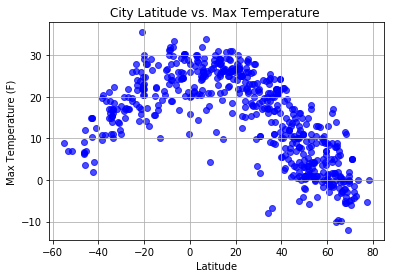

In [33]:


plt.scatter(weather_data["Lat"],weather_data["Max Temp"], c="blue", alpha=0.70 )

 # Add labels to the x and y axes
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

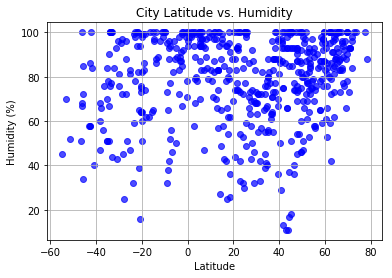

In [34]:

plt.scatter(weather_data["Lat"],weather_data["Humidity"], c="blue", alpha=0.70 )

 # Add labels to the x and y axes
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

plt.show()


#### Latitude vs. Cloudiness Plot

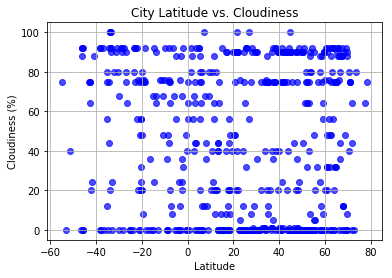

In [35]:

plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], c="blue", alpha=0.70 )

 # Add labels to the x and y axes
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

plt.show()


#### Latitude vs. Wind Speed Plot

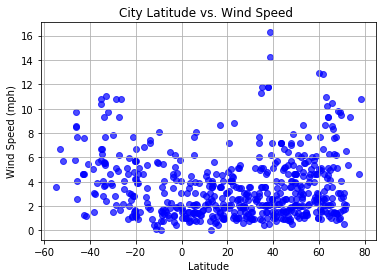

In [36]:

plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], c="blue", alpha=0.70 )

 # Add labels to the x and y axes
plt.title("City Latitude vs. Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)

plt.show()